### Ejercicio 1

La base de datos **MNIST** contiene imágenes de 28×28, en escala de grises, de números escritos a mano.  
Está conformada por **60.000 ejemplos de entrenamiento** y **10.000 ejemplos de prueba**.

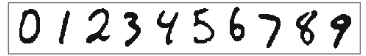

Para cargar las imágenes utilice:

```python
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

Puede visualizar una imagen utilizando:

```py
nImg = 0  # nro. de imagen a visualizar
plt.imshow(X_train[0, :, :], cmap='gray')
```
## a)

Con el conjunto de 60.000 imágenes, entrene una red neuronal convolucional (CNN) para predecir el dígito presente en la imagen.
Recuerde normalizar los valores de cada imagen.
Salve el modelo para recuperarlo después.

## b)

Levante el modelo guardado en el punto anterior y utilice la clase DrawPanel del módulo utils.images 
de la carpeta fuentes para generar un dibujo escrito a mano de un dígito y predecir la clase a la que pertenece.

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
# Cargar y normalizar el conjunto de datos MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))
IMG_SHAPE = X_train[0].shape
TARGET_CNT= len(Y_train[0])

print("Cantidad de imágenes de entrenamiento:", len(X_train))
print("Cantidad de imágenes de prueba:", len(X_test))
print("Forma de una imagen:", IMG_SHAPE)
print("Cantidad de clases objetivo:", TARGET_CNT)

X_train = X_train / 255
X_test  = X_test  / 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

Cantidad de imágenes de entrenamiento: 60000
Cantidad de imágenes de prueba: 10000
Forma de una imagen: (28, 28)
Cantidad de clases objetivo: 10


In [6]:
# Entrentar red convulucional
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # Usamos esto porque las imágenes son en escala de grises
model.add(MaxPooling2D(pool_size=(2, 2))) # Reducimos la dimensionalidad para disminuir el costo computacional
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # Segunda capa convolucional para extraer características más complejas
model.add(MaxPooling2D(pool_size=(2, 2)))    # Otra capa de pooling para seguir reduciendo la dimensionalidad
model.add(Flatten()) # Aplanamos las matrices 2D a un vector 1D para conectarlo a la capa densa
model.add(Dense(128, activation='relu')) # Capa densa con 128 neuronas y función de activación ReLU para introducir no linealidad
model.add(Dropout(0.5)) # Capa de dropout para prevenir el sobreajuste
model.add(Dense(TARGET_CNT, activation='softmax')) # Capa de salida con función de activación softmax para clasificación multiclase

# Terminar antes si la precisión de validación no mejora en 3 épocas consecutivas

cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[cb])

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Precisión en el conjunto de prueba:', test_acc)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8966 - loss: 0.3368 - val_accuracy: 0.9759 - val_loss: 0.0806
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9659 - loss: 0.1148 - val_accuracy: 0.9843 - val_loss: 0.0567
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0837 - val_accuracy: 0.9862 - val_loss: 0.0495
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0713 - val_accuracy: 0.9865 - val_loss: 0.0486
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9881 - val_loss: 0.0409
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0520 - val_accuracy: 0.9891 - val_loss: 0.0397
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy: 0.

In [10]:
# Levante el modelo guardado en el punto anterior y utilice la clase DrawPanel del módulo utils.images 
# de la carpeta fuentes para generar un dibujo escrito a mano de un dígito y predecir la clase a la que pertenece.

import utils as img_utils
drawn_image = img_utils.DrawPanel(width=200, height=200)
drawn_image.show()
# Obtener la imagen dibujada, preprocesarla y hacer la predicción
image = drawn_image.get_image()
image = image.resize((28, 28)).convert('L')  # Redimensionar y convertir a escala de grises
image_array = np.array(image) / 255.0  # Normalizar
image_array = image_array.reshape(1, 28, 28, 1)  # Ajustar la forma para el modelo
prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)
print("El dígito predicho es:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
El dígito predicho es: 8
